Calculating CNN Article Sizes......
1  files read
101  files read
201  files read
301  files read
401  files read
501  files read
601  files read
701  files read
801  files read
901  files read
1001  files read
1101  files read
1201  files read
1301  files read
1401  files read
1501  files read
1601  files read
1701  files read
1801  files read
1901  files read
2001  files read
2101  files read
2201  files read
2301  files read
2401  files read
2501  files read
2601  files read
2701  files read
2801  files read
2901  files read
3001  files read
3101  files read
3201  files read
3301  files read
3401  files read
3501  files read
3601  files read
3701  files read
3801  files read
3901  files read
4001  files read
4101  files read
4201  files read
4301  files read
4401  files read
4501  files read
4601  files read
4701  files read
4801  files read
4901  files read
5001  files read
5101  files read
5201  files read
5301  files read
5401  files read
5501  files read
5601  files read
5701  f

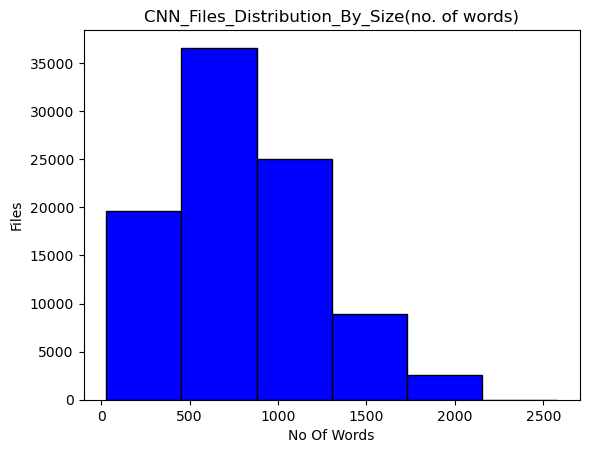

max_length_of_article_in_article:  2578  and file_name is  f72f7cc73be63c9f2efb4a8fe6678609a187a24b.story
total_time_taken 8.389219868183137  minutes
mean_length_of_article_articles:  809.7900495792783
max_10_lengths_of_article_articles: [2105 2106 2106 2106 2107 2107 2107 2109 2111 2111 2111 2111 2112 2112
 2113 2113 2113 2114 2114 2116 2117 2118 2119 2120 2120 2121 2121 2123
 2124 2125 2127 2129 2130 2132 2132 2132 2133 2133 2136 2137 2140 2140
 2142 2142 2147 2156 2170 2218 2383 2578]
number_of_articles_greater_than_1000_words:  27431
number_of_articles_greater_than_1500_words:  6022
number_of_articles_greater_than_2000_words:  506


<Figure size 640x480 with 0 Axes>

In [1]:
import os
import sys
import time
import numpy as np
import pickle
import matplotlib.pyplot as plt


def make_dir(path):
    if not os.path.exists(path):
        os.mkdir(path)
        os.chdir(path)

#calculates no of words in cnn/dm articles
def calc_article_sizes(file_name, name):
    max_len = 0
    article_sizes = {}
    print("Calculating",name, "Article Sizes......")
    for i,file in enumerate(os.listdir(file_name)):
        file = os.path.join(os.getcwd(),file_name,file)
        #print(file)
        with open(file,'r',encoding='utf-8') as f:
            txt = f.read().split()
        txt_len = len(txt)
        article_sizes[os.path.basename(file)] = txt_len
        if max_len<txt_len:
            max_len = txt_len
            max_len_filename = os.path.basename(file)
        if i%100==0:
            print(i+1, " files read")
    return max_len, max_len_filename, article_sizes


if __name__ == '__main__':
        start = time.time()
        #if sys.argv[1].startswith("cnn"):
        #	name = "CNN"
        #else:
        name = "CNN"
        make_dir("C:/Users/ASUS/Downloads/"+name)
        max_len, max_len_filename, article_sizes = calc_article_sizes('C:/Users/ASUS/Downloads/Dataset for NLP/cnn_stories_tokenized/cnn_stories_tokenized', name)
        sorted_article_values = np.array(sorted(article_sizes.values()))
        article_sizes = dict(sorted(article_sizes.items(), key=lambda item:item[1]))
        print("saving_article_files_sizes_info...")
        os.chdir("C:/Users/ASUS/Downloads/"+name)
        with open(name+"_file_size.pickle", 'wb') as f:
            pickle.dump(article_sizes, f)

        #plot the distribution of articles sizes
        plt.hist(sorted_article_values,color='blue',bins=6, edgecolor = 'black')
        plt.title(name+"_Files_Distribution_By_Size(no. of words)")
        plt.xlabel('No Of Words')
        plt.ylabel('Files')
        plt.show()
        plt.savefig(name+" files distribution by length")

        print('max_length_of_article_in_article: ',max_len, " and file_name is ", max_len_filename)
        print("total_time_taken",(time.time()-start)/60, " minutes")
        print("mean_length_of_article_articles: ", sum(article_sizes.values())/len(article_sizes))
        print("max_10_lengths_of_article_articles:", sorted_article_values[-50:])
        print("number_of_articles_greater_than_1000_words: ", sum(sorted_article_values>1000))
        print("number_of_articles_greater_than_1500_words: ", sum(sorted_article_values>1500))
        print("number_of_articles_greater_than_2000_words: ", sum(sorted_article_values>2000))
        #print(article_sizes)